**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solucao implementada

In [1]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random as random

import alegrete

### Visualizacao dos dados

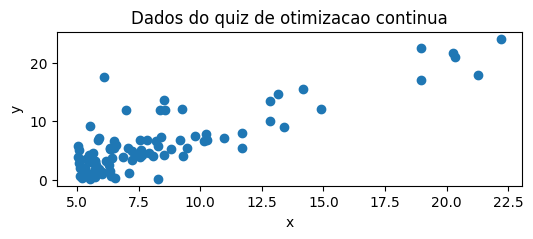

In [2]:
# dataset do Quiz de Otimizacao Continua -- troque para carregar o alegrete.csv
quiz_data = np.array([
    [1, 3],
    [2, 4],
    [3, 4],
    [4, 2]
])

quiz_data = np.loadtxt("alegrete.csv",dtype=float,delimiter=',')

#Gráfico dos dados
plt.figure(figsize=(6, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dados do quiz de otimizacao continua')
plt.show()

### Execucao da regressao linear e calculo do EQM por epoca/iteracao

array([[ 6.1101 , 17.592  ],
       [ 5.5277 ,  9.1302 ],
       [ 8.5186 , 13.662  ],
       [ 7.0032 , 11.854  ],
       [ 5.8598 ,  6.8233 ],
       [ 8.3829 , 11.886  ],
       [ 7.4764 ,  4.3483 ],
       [ 8.5781 , 12.     ],
       [ 6.4862 ,  6.5987 ],
       [ 5.0546 ,  3.8166 ],
       [ 5.7107 ,  3.2522 ],
       [14.164  , 15.505  ],
       [ 5.734  ,  3.1551 ],
       [ 8.4084 ,  7.2258 ],
       [ 5.6407 ,  0.71618],
       [ 5.3794 ,  3.5129 ],
       [ 6.3654 ,  5.3048 ],
       [ 5.1301 ,  0.56077],
       [ 6.4296 ,  3.6518 ],
       [ 7.0708 ,  5.3893 ],
       [ 6.1891 ,  3.1386 ],
       [20.27   , 21.767  ],
       [ 5.4901 ,  4.263  ],
       [ 6.3261 ,  5.1875 ],
       [ 5.5649 ,  3.0825 ],
       [18.945  , 22.638  ],
       [12.828  , 13.501  ],
       [10.957  ,  7.0467 ],
       [13.176  , 14.692  ],
       [22.203  , 24.147  ],
       [ 6.5894 ,  5.9966 ],
       [ 9.2482 , 12.134  ],
       [ 5.8918 ,  1.8495 ],
       [ 8.2111 ,  6.5426 ],
       [ 7.933

/home/joaocosme/Estudos/UFRGS/Etapa5/IA-UFRGS-2022-1/Trab-3/alegrete.py:43: RuntimeWarning: overflow encountered in double_scalars
  somatorio_dos_quadrados += pow(calcula_y(theta_0,


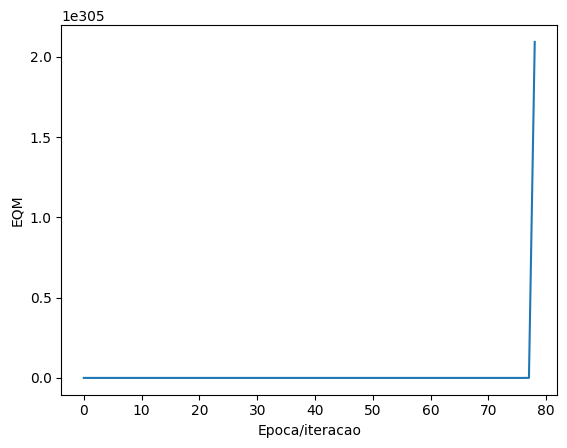

In [3]:
theta_0s, theta_1s = alegrete.fit(
    quiz_data, theta_0=0, theta_1=0, 
    alpha=0.5, num_iterations=100, normalize_features=True
)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

mse_list = [alegrete.compute_mse(th0, th1, quiz_data) for th0, th1 in zip(theta_0s, theta_1s)]
print(f"EQM final: {mse_list[-1]}")


plt.plot(mse_list)
plt.xlabel('Epoca/iteracao')
plt.ylabel('EQM')
plt.show()

### Plot da curva final

Curva encontrada: 1.1606254692752314*x + -3.4500335390399335


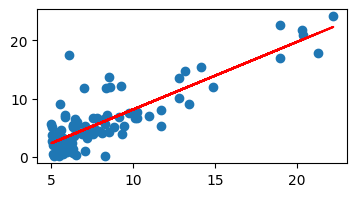

In [24]:
theta_0s, theta_1s = alegrete.fit(
    quiz_data, theta_0=0, theta_1=0, 
    alpha=0.01, num_iterations=100000, normalize_features=False
)

# valores finais de theta0 e theta1
final_th0, final_th1 = theta_0s[-1], theta_1s[-1]

#Imprimir parâmetros otimizados
print (f'Curva encontrada: {final_th1}*x + {final_th0}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(quiz_data[:,0], quiz_data[:,1])

# plota a curva de ajuste
pred = final_th1*quiz_data[:,0] + final_th0
plt.plot(quiz_data[:,0], pred, c='r')
plt.show()




### Progresso da descida do gradiente com o número de iterações

Execute a celula e use os controles abaixo do grafico para visualizar o progresso do seu ajuste

Pode aparecer um grafico "extra" abaixo da animacao, apenas ignore.

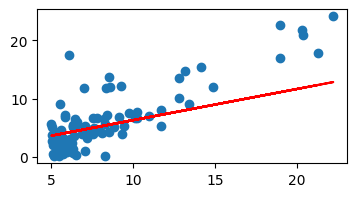

In [ ]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(quiz_data[:,0], quiz_data[:,1])

# linha com os valores iniciais dos parametros
pred = theta_1s[0]*quiz_data[:,0] + theta_0s[0]
line, = ax.plot(quiz_data[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = theta_1s[i] * quiz_data[:,0] + theta_0s[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(theta_0s), interval=20, save_count=50)
HTML(ani.to_jshtml())